# Create the data




##Import libraries




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##Create Datas


In [ ]:

points_per_class = 100
dimensionality = 2
class_num = 3

def create_datas(points_per_class, class_num, dimensionality):
  X =np.zeros((points_per_class*class_num, dimensionality))
  y = np.zeros(points_per_class*class_num, dtype = "uint8")

  for i in range(class_num):
      ix = range(points_per_class*i, points_per_class*(i+1))
      r = np.linspace(0.0, 1, points_per_class)
      t = np.linspace(i * 4, (i+1) * 4, points_per_class) + np.random.randn(points_per_class)*0.2
      X[ix] = np.c_[r * np.sin(t), r*np.cos(t)]
      y[ix] = i

  return X, y

X, y = create_datas(points_per_class, class_num, dimensionality)

##Print Datas

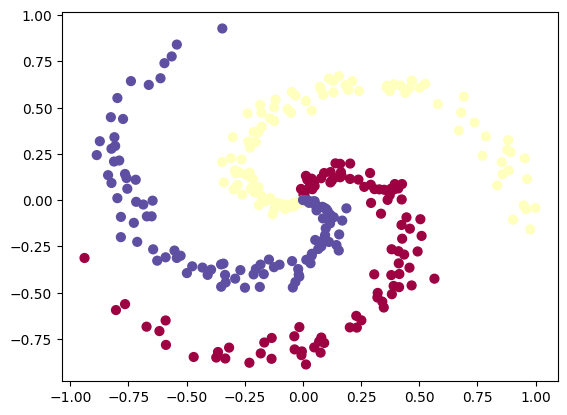

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.Spectral)
plt.show()

#  Train a Softmax Linear Classifier

##1.) Compute all class scores via single matrix multiplication

Generate a Random Weight


In [ ]:
# dimensions of matrixes
# F(X,W) --> class_num * points_per_class , class_num
# X --> class_num * points_per_class , dimension
# xi --> dimension, 1
# W --> class_num, dimension
# b --> class_num, 1
# class scores of one dot = class_num , 1

# perform bias trick
X = np.hstack([X, np.ones((X.shape[0], 1))])
W = np.random.randn(class_num, dimensionality + 1)
print(W)

[[ 2.13181257 -0.09687305  0.38860736]
 [ 1.49411114  0.43510085  0.43138814]
 [ 0.53836534 -0.03488375 -0.36959601]]


In [ ]:
def make_predictions(X, W):
    return np.dot(X, W.T)

all_class_scores = make_predictions(X, W)
print(all_class_scores.shape)

(300, 3)


##2.) Compute the loss : cross-entropy loss

In [ ]:
def softmax(X):
    exps = np.exp(X - np.max(X, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

def cross_entropy(scores, y):
    """
    scores --> 300 x 3 array containing all datas and scores for each class
    y --> labels (num_examples x 1), not one-hot encoded vector.
    """
    m = y.shape[0]
    p = softmax(scores)
    log_likelihood = -np.log(p[range(m),y])
    print(log_likelihood)
    loss = np.sum(log_likelihood) / m
    return loss

loss = cross_entropy(all_class_scores, np.array(y))
print(loss)

[0.92116542 0.92153036 0.92137731 0.92709492 0.9268079  0.93174221
 0.94005123 0.91260629 0.92218254 0.91114624 0.91602548 0.9365513
 0.92768766 0.94503094 0.90593647 0.87918866 0.8783638  0.90568142
 0.87582063 0.89204549 0.86375193 0.86297957 0.86858467 0.84004062
 0.8922475  0.88112976 0.82130829 0.80010886 0.85940951 0.76666323
 0.78914258 0.77617506 0.80516879 0.76619031 0.73408085 0.75609286
 0.73742249 0.73885496 0.74395257 0.73785397 0.74231692 0.73051184
 0.71097876 0.72851078 0.68217301 0.68160195 0.67382993 0.6658183
 0.66279898 0.65902083 0.68001686 0.65454199 0.64516766 0.64559086
 0.63422655 0.64700757 0.62464043 0.63341672 0.62194538 0.65405446
 0.63162487 0.65001952 0.62057913 0.62647208 0.63658108 0.60023693
 0.67257868 0.62803599 0.78469371 0.65804709 0.56876309 0.67412614
 0.65982828 0.78723467 0.72424735 0.84117038 0.72506836 0.71251935
 0.85551794 0.73011401 0.77331887 0.75436918 0.71094531 0.75161019
 0.85366481 0.94609183 0.82053013 1.17205715 0.7321817  0.973836

##3.) Compute the analytic gradient with backpropagation

In [ ]:
def compute_gradients(scores, X, y : list):
    """
    scores --> 300 x 3 array containing all datas and scores for each class
    X --> all points and their dimensions
    y --> correct labels for each point
    """
    probs = softmax(scores)
    probs[range(len(y)), y] -= 1
    return np.dot(X.T, probs) / len(y)

gradients = compute_gradients(all_class_scores, X, y)
print(gradients)

[[-0.00857008 -0.05707449  0.06564457]
 [ 0.07264648 -0.08753811  0.01489163]
 [ 0.06286991  0.06827222 -0.13114213]]


##4.) Perform parameter update

In [ ]:
def update_parameters(W, gradients, learning_rate):
    return W - learning_rate * gradients

W = update_parameters(W, gradients.T, 0.001)
print(W)

[[ 2.13182114 -0.09694569  0.38854449]
 [ 1.49416821  0.43518839  0.43131987]
 [ 0.5382997  -0.03489864 -0.36946487]]


##5.) Train the classifier

In [ ]:
def train(X, y, iterations : int, learning_rate : float):
    loss_change = []

    X = np.hstack([X, np.ones((X.shape[0], 1))])
    W = np.random.randn(class_num, dimensionality + 1)

    for i in range(iterations):
        all_class_scores = make_predictions(X, W)

        loss = cross_entropy(all_class_scores, np.array(y))

        gradients = compute_gradients(all_class_scores, X, y)

        W = update_parameters(W, gradients.T, learning_rate)

        if i% 100 == 0:
            print(loss)
        loss_change.append(loss)

    return W, loss_change

X, y = create_datas(points_per_class, class_num, dimensionality)
W, loss_change = train(X, y, 1000, 0.02)



426.5868132957621
1.421956044319207
425.5936653322739
424.6099496996852
423.6355715150161
422.6704363578306
421.7144502847455
420.7675198433799
419.8295520857527
418.90045458113616
417.98013542837134
417.0685032676543
416.16546729180163
415.2709372570014
414.38482349306014
413.50703691315266
412.63748902308436
411.77609193007424
410.9227583510675
410.07740162058747
409.2399356981348
408.4102751751441
407.58833528150603
406.77403189166614
405.96728153030676
405.16800137762425
404.3761092742093
403.5915237255392
402.8141639060934
402.0439496630989
401.2808015199174
400.5246406790815
399.77538902499043
399.0329691262732
398.2973042378294
397.5683183025559
396.845935952769
396.1300825113299
395.42068399248325
394.71766710241695
394.02095923955164
393.33048849456895
392.6461836501856
391.9679741806834
391.2957902512016
390.62956271680054
389.9692231213041
389.31470369592876
388.66593735770715
388.02285770771334
387.385399029097
386.75349628493416
386.1270851159014
385.50610183778065
384.890

##6.) Draw a graph with respect to loss change for each iteration

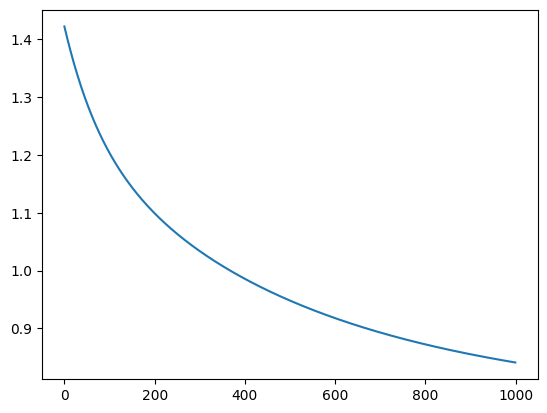

In [ ]:
plt.plot(loss_change)
plt.show()

##7.) Calculate accuracy

In [ ]:
# give accuracy
X = np.hstack([X, np.ones((X.shape[0], 1))])
y_pred = make_predictions(X, W)
y_pred = np.argmax(y_pred, axis=1)
print(np.mean(y_pred == y))

0.5266666666666666


 ## 8.) Plot the learned decision boundaries

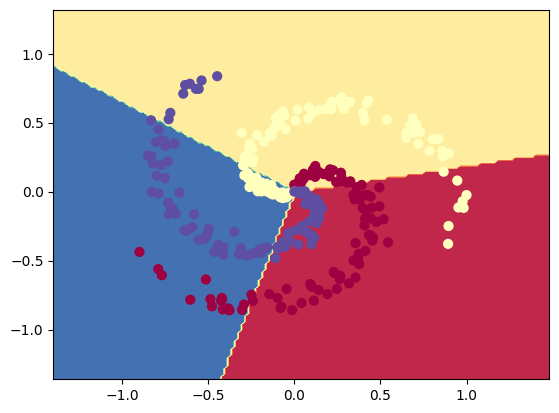

In [ ]:
h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = make_predictions(np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape[0])], W)
Z = np.argmax(Z, axis=1).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.Spectral)
plt.show()

#  Train a Neural Network

## 1.) Use 2-layer neural network

In [ ]:
# size of hidden layer
hidden_layer_size = 20

# two layers
W1 = np.random.randn(dimensionality, hidden_layer_size)
W2 = np.random.randn(hidden_layer_size, class_num)

# biases
b1 = np.zeros((1, hidden_layer_size))
b2 = np.zeros((1, class_num))

## 2.) Use cross-entropy loss and backpropagation

In [ ]:
def sigmoid_activation(X, W, b):
    x = X.dot(W) + b
    return 1 / (1 + np.exp(-x))

def relu_activation(X, W, b):
    x = X.dot(W) + b
    return np.maximum(0, x)

def softmax(X):
    exps = np.exp(X - np.max(X, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

def cross_entropy(scores, y):
    """
    scores --> 300 x 3 array containing all datas and scores for each class
    y --> labels (num_examples x 1), not one-hot encoded vector.
    """
    m = y.shape[0]
    p = softmax(scores)
    log_likelihood = -np.log(p[range(m),y])
    loss = np.sum(log_likelihood) / m
    return loss

def backpropagation(X, y, W1, b1, W2, b2, reg, i):
    # Forward pass: compute predicted y
    hidden_layer = relu_activation(X, W1, b1)
    W2_pred = hidden_layer.dot(W2) + b2

    # compute loss
    data_loss = cross_entropy(W2_pred, y)
    reg_loss = 0.5 * reg * np.sum(W1 * W1) + 0.5 * reg * np.sum(W2 * W2)
    loss = data_loss + reg_loss

    if i % 100 == 0:
        print(f"loss {loss}")

    # Backward pass: compute gradients
    dscores = softmax(W2_pred)
    dscores[range(len(y)), y] -= 1
    print(len(y))
    print(dscores)

    # dscores /= len(y)
    print(dscores)

    gradW2 = np.dot(hidden_layer.T, dscores)
    gradb2 = np.sum(dscores, axis=0, keepdims=True)

    dhidden = np.dot(dscores, W2.T)
    dhidden[hidden_layer <= 0] = 0

    gradW1 = np.dot(X.T, dhidden)
    gradb1 = np.sum(dhidden, axis=0, keepdims=True)

    gradW2 += reg * W2
    gradW1 += reg * W1

    return gradW1, gradb1, gradW2, gradb2, loss

## 3.) Perform parameter update

In [ ]:
def parameter_update(W1, b1, W2, b2, gradW1, gradb1, gradW2, gradb2, step_size):
    W1 -= step_size * gradW1
    b1 -= step_size * gradb1
    W2 -= step_size * gradW2
    b2 -= step_size * gradb2

    return W1, b1, W2, b2

## 4.) Train the neural network

In [ ]:
def train(X, y, W1, b1, W2, b2, reg, step_size, num_passes):
    losses = []
    for i in range(0, num_passes):
        gradW1, gradb1, gradW2, gradb2, loss = backpropagation(X, y, W1, b1, W2, b2, reg, i)
        W1, b1, W2, b2 = parameter_update(W1, b1, W2, b2, gradW1, gradb1, gradW2, gradb2, step_size)
        losses.append(loss)
    return losses, W1, b1, W2, b2

reg = 1e-4
step_size = 0.5
iterations = 100
X, y = create_datas(points_per_class, class_num, dimensionality)
losses, W1, b1, W2, b2 = train(X, y, W1, b1, W2, b2, reg, step_size, iterations)


loss 1.3813756517880678
300
[[-0.66666667  0.33333333  0.33333333]
 [-0.67742874  0.33327676  0.34415198]
 [-0.68822137  0.33308185  0.35513953]
 [-0.69899067  0.33273455  0.36625611]
 [-0.70992638  0.33241476  0.37751161]
 [-0.72180968  0.33189261  0.38991708]
 [-0.73212438  0.33087064  0.40125374]
 [-0.74079186  0.32942907  0.41136279]
 [-0.74682547  0.32567597  0.4211495 ]
 [-0.75734499  0.32428732  0.43305767]
 [-0.76638316  0.32213572  0.44424744]
 [-0.75112084  0.30791035  0.44321049]
 [-0.73847736  0.29877855  0.43969881]
 [-0.79573788  0.31646308  0.4792748 ]
 [-0.77639243  0.30055163  0.4758408 ]
 [-0.80091384  0.30635475  0.49455909]
 [-0.71986038  0.27951977  0.44034061]
 [-0.77839298  0.28299093  0.49540205]
 [-0.76667849  0.27745458  0.48922391]
 [-0.77129073  0.27370397  0.49758676]
 [-0.81301139  0.27676553  0.53624586]
 [-0.7512851   0.26348809  0.48779702]
 [-0.60618922  0.24017993  0.36600929]
 [-0.7500757   0.2554457   0.49463   ]
 [-0.74108566  0.2504503   0.4906353

<ipython-input-103-1a26f7d0bdbb>:20: RuntimeWarning: divide by zero encountered in log
  log_likelihood = -np.log(p[range(m),y])


Görüntülenen çıkış son 5000 satıra kısaltıldı.
 [ 8.24045748e-12 -8.24074142e-12  1.90352612e-16]
 [ 8.24045748e-12 -8.24074142e-12  1.90352612e-16]
 [ 8.24045748e-12 -8.24074142e-12  1.90352612e-16]
 [ 8.24045748e-12 -8.24074142e-12  1.90352612e-16]
 [ 8.24045748e-12 -8.24074142e-12  1.90352612e-16]
 [ 8.24045748e-12 -8.24074142e-12  1.90352612e-16]
 [ 8.24045748e-12 -8.24074142e-12  1.90352612e-16]
 [ 8.24045748e-12 -8.24074142e-12  1.90352612e-16]
 [ 8.24045748e-12 -8.24074142e-12  1.90352612e-16]
 [ 8.24045748e-12 -8.24074142e-12  1.90352612e-16]
 [ 8.24045748e-12 -8.24074142e-12  1.90352612e-16]
 [ 8.24045748e-12 -8.24074142e-12  1.90352612e-16]
 [ 8.24045748e-12 -8.24074142e-12  1.90352612e-16]
 [ 8.24045748e-12 -8.24074142e-12  1.90352612e-16]
 [ 8.24045748e-12 -8.24074142e-12  1.90352612e-16]
 [ 8.24045748e-12 -8.24074142e-12  1.90352612e-16]
 [ 8.24045748e-12 -8.24074142e-12  1.90352612e-16]
 [ 8.24045748e-12 -8.24074142e-12  1.90352612e-16]
 [ 8.24045748e-12 -8.24074142e-12  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## 5.) Draw a graph with respect to loss change for each iteration

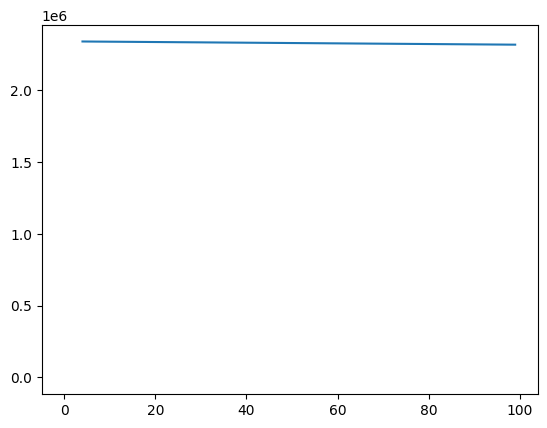

In [ ]:
plt.plot(losses)

## 6.) Calculate accuracy

In [ ]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.33


## 7.) Plot the learned decision boundaries

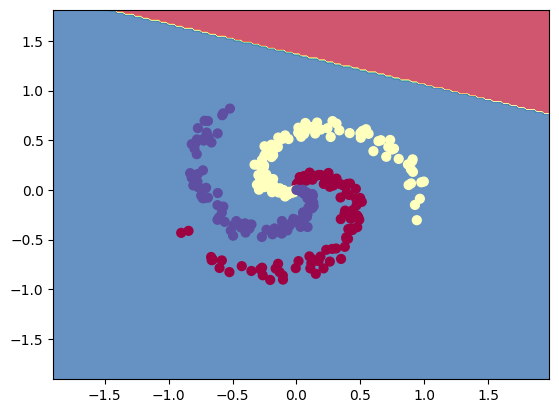

In [ ]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()
